In [1]:
! pip install import-ipynb


In [2]:
import import_ipynb

importing Jupyter notebook from googletrendsABA_MSciProject.ipynb
  Cloning https://github.com/GeneralMills/pytrends to /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-ioin914u
  Running command git clone -q https://github.com/GeneralMills/pytrends /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-ioin914u
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warning

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2018-08-19 to 2023-08-06
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  260 non-null    int64
 1   isPartial  260 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, Week to 2023-07-23
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  261 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     261 non-null    object
 1   Category: All categories  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB
<class 

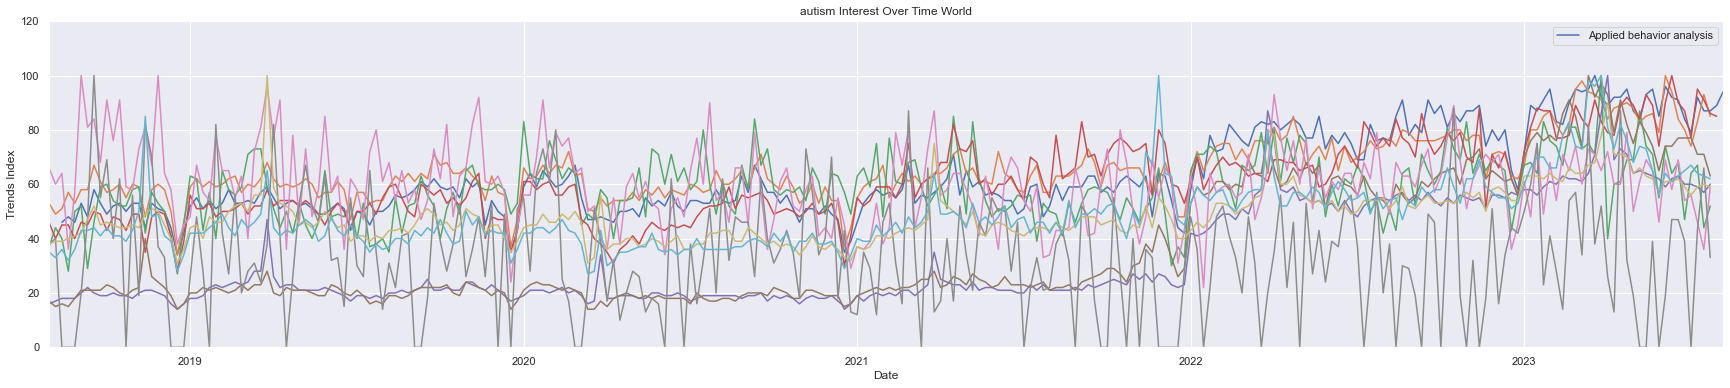

In [3]:
# import wordbank sets resulted from the google trends data analysis
from googletrendsABA_MSciProject import asd_wordbank_set, aba_wordbank_set

In [4]:
asd_wordbank_set

{'asd',
 'asd disorder',
 'asd spectrum',
 'asperger',
 'aspergers',
 'aspergers autism',
 'autism',
 'autism disorder',
 'autism spectrum',
 'autism spectrum disorder',
 'autistic',
 'autistic spectrum disorder',
 'autistic spectrum disorders',
 'high functioning autism',
 'high-functioning autism spectrum disorder',
 'neurodivergent'}

In [5]:
aba_wordbank_set

{'aba',
 'aba behavior',
 'aba behavior therapy',
 'aba behavioral therapy',
 'aba conversion therapy',
 'aba home therapy',
 'aba school',
 'aba services',
 'aba therapist',
 'aba therapy',
 'aba therapy center',
 'aba therapy school',
 'aba therapy services',
 'aba training',
 'aba tutor',
 'acceptance and commitment therapy',
 'applied behavior analysis',
 'applied behaviour analysis',
 'bcaba',
 'bcba',
 'behavior',
 'behavior analysis',
 'behavior analyst',
 'behavior technician',
 'behavior therapy',
 'behavioral analysis',
 'behavioral therapy',
 'behaviorism',
 'behaviour',
 'behaviour analysis',
 'behaviour technician',
 'behavioural analysis',
 'discrete trial training',
 'dtt',
 'rbt',
 'registered behavior technician',
 'registered behaviour technician'}

Reddit data is accessed via the Reddit API (documentation: https://www.reddit.com/dev/api/) using PRAW (Python Reddit API Wrapper - documentation: https://praw.readthedocs.io/en/stable/index.html). PRAW provides an easy way to interact with the Reddit API.

The Reddit API can be accesed through an app that needs to be created on Reddit's website https://www.reddit.com/prefs/apps. To be able to create an app, a Reddit account is needed. For the purpose of this project I used my already existing Reddit account to create an app called *andrea_MSci_ project* ( as a script for personal use ). However, as the data accessed is public, the username and password for my account do not need to be provided, so the script bellow does not include them ( the only reason the account is needed is to create the app ).

After creating the app, an unique identifier is be provided - see below CLIENT_ID - along with an unique authorization secret key - see below CLIENT_SECRET. These variables, or tokens, are kept in a .env file that is not made avilable on Github.

In [13]:
# https://pypi.org/project/python-dotenv/
# python-dotenv is used to access environment variables in a jupyter notebook
# see more details at: https://analyzingalpha.com/jupyter-notebook-environment-variables-tutorial
! pip install python-dotenv

In [8]:
# import the tokens needed to get access to Reddit's API
import os
from dotenv import load_dotenv
load_dotenv()
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
CLIENT_ID = os.environ.get('CLIENT_ID')

In [10]:
# print(CLIENT_SECRET + '\n' + CLIENT_ID)

In [14]:
! pip install praw

In [15]:
import praw

In [18]:
# get access to the Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent="MyMsciAPI/0.0.1",   # this can be named anything
)

### Get a list of subreddits that are relevant to ASD

Use the *asd_wordbank_set* to search Reddit for all the subreddits that contain any of the keywords in the set. As per, PRAW documentation (https://praw.readthedocs.io/en/stable/code_overview/reddit/subreddits.html#praw.models.Subreddit), subreddits are searched by both their title and description.

According to Reddit documentation (https://www.reddit.com/dev/api/#GET_subreddits_search), the maximum subreddits that can be obtained at once, is 100. However we can obtain the all the subreddits that relevant, if we make multiple API calls of 100 - PRAW does this automatically ( 'for larger requests PRAW will break it into multiple API calls of 100 items each separated by a small 2 second delay to follow the api guidelines.' - https://praw.readthedocs.io/en/v3.6.2/pages/getting_started.html#:~:text=reddit%20allows%20requests%20of%20up,to%20follow%20the%20api%20guidelines.). Thus for all these API calls the limit is set to None, in order to get all the subreddits that are found to match the queries ( = the keywords in the ASD set above).


Date: 15/08/2023

Query: all keywords in *asd_wordbank_set* ( see above )

Limit: None ( all subreddits avaialble on the Reddit platform at the date above )

In [43]:
# save all the subreddits that are matched to the ASD keywords in the wordbank
# to access the subreddit name use subreddit.display_name_prefixed or subreddit.display_name
# a set is used to store the data, to remove any duplicates 
asd_subreddits_set = set()
for keyword in asd_wordbank_set: 
    for subreddit in reddit.subreddits.search(keyword, limit=None):
        asd_subreddits_set.add(subreddit)

In [70]:
# 578 subreddits relevant to ASD (= matching the keywords in the ASD wordbank created previously) were obtained
len(asd_subreddits_set)

578

In [68]:
# see available attributes of the subreddit object returned by PRAW
# https://praw.readthedocs.io/en/stable/getting_started/quick_start.html
import pprint
sb = list(asd_subreddits_set)[0]
pprint.pprint(vars(sb))

{'_fetched': True,
 '_path': 'r/AutisticFTM/',
 '_reddit': <praw.reddit.Reddit object at 0x7fb8132ee760>,
 'accept_followers': True,
 'accounts_active': 4,
 'accounts_active_is_fuzzed': False,
 'active_user_count': 4,
 'advertiser_category': '',
 'all_original_content': False,
 'allow_chat_post_creation': False,
 'allow_discovery': True,
 'allow_galleries': True,
 'allow_images': True,
 'allow_polls': True,
 'allow_prediction_contributors': False,
 'allow_predictions': False,
 'allow_predictions_tournament': False,
 'allow_talks': False,
 'allow_videogifs': True,
 'allow_videos': True,
 'allowed_media_in_comments': [],
 'banner_background_color': '',
 'banner_background_image': '',
 'banner_img': '',
 'banner_size': None,
 'can_assign_link_flair': False,
 'can_assign_user_flair': False,
 'collapse_deleted_comments': False,
 'comment_contribution_settings': {},
 'comment_score_hide_mins': 60,
 'community_icon': '',
 'community_reviewed': False,
 'created': 1416398117.0,
 'created_utc': 

In [71]:
for v in vars(sb):
    print(v)

_reddit
user_flair_background_color
submit_text_html
restrict_posting
user_is_banned
free_form_reports
wiki_enabled
user_is_muted
user_can_flair_in_sr
display_name
header_img
title
allow_galleries
icon_size
primary_color
active_user_count
icon_img
display_name_prefixed
accounts_active
public_traffic
subscribers
user_flair_richtext
videostream_links_count
name
quarantine
hide_ads
prediction_leaderboard_entry_type
emojis_enabled
advertiser_category
public_description
comment_score_hide_mins
allow_predictions
user_has_favorited
user_flair_template_id
community_icon
banner_background_image
original_content_tag_enabled
community_reviewed
submit_text
description_html
spoilers_enabled
comment_contribution_settings
allow_talks
header_size
user_flair_position
all_original_content
has_menu_widget
is_enrolled_in_new_modmail
key_color
can_assign_user_flair
created
wls
show_media_preview
submission_type
user_is_subscriber
allowed_media_in_comments
allow_videogifs
should_archive_posts
user_flair_typ